#Parkinson's Disease Detection
- Detecting parkinson's disease based on certain medical procedures
- It is a progresive nervous system disorder that afftects body movement
- We need to design a ML system to diagnose the disease at early stages so that it can treated early

Work Flow:
1. Collection of Parkinson's Data
2. Data Pre processing
3. Train Test Split
4. Support Vector Machine Classifier -Model Training
5. Model Evaluation

#Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
#Models That reqire standardization-Linaer,Lasso,Logistic Regression,SVM classfier,KNN,K-means i.e those models based on gradient descent,distances,dot products etc.
#Models that do not require stanadardization - Decision Tree,Random Forest,Naive Bayes,Gradient Boosting ie those based on probabilties and counts and splits

#Data Collection & Analysis

In [8]:
parkinson=pd.read_csv('/content/parkinsons_data.csv')
#laoding the dataset to pandas dataframe

In [9]:
parkinson.head()
#first 5 rows of the dataset

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [10]:
parkinson.shape
#no of rows and columns in the dataset

(195, 24)

In [13]:
parkinson.info()
#gives information about the dataset
#status -> target label
# 1-> Unhealthy
# 0-> Healthy

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [22]:
#checking for missing values
parkinson.isnull().sum()

,0
name,0
MDVP:Fo(Hz),0
MDVP:Fhi(Hz),0
MDVP:Flo(Hz),0
MDVP:Jitter(%),0
MDVP:Jitter(Abs),0
MDVP:RAP,0
MDVP:PPQ,0
Jitter:DDP,0
MDVP:Shimmer,0


In [14]:
#statistical measures about the dataset
parkinson.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


<Axes: xlabel='status', ylabel='count'>

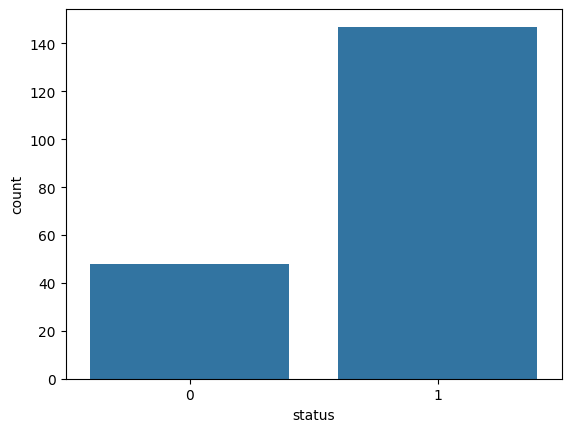

In [23]:
#distribution of status column
#count of 0s and 1s in the status
sns.countplot(x='status',data=parkinson)

In [24]:
parkinson['status'].value_counts()
# 1-> Parkinson's Positive
# 0-> Healthy

,count
status,
1,147
0,48


In [32]:
parkinson.drop(columns='name',axis=1,inplace=True)
# We wil drop the name column as  it is an obstacle for numeric calcuations

In [33]:
#grouping the data based on the target variable
parkinson.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


#Data Preprocessing


In [34]:
#separating the features & target
X=parkinson.drop(columns=['status'],axis=1)
Y=parkinson['status']

In [35]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [36]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


#Train Test Split

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [57]:
print(X.shape,X_train.shape,X_test.shape)

(195, 22) (156, 22) (39, 22)


#Data Standardization

The dataaset contains various columns with different ranges of we need to convert all these values within a same range without changing the meaning of the column

In [58]:
X_train.values.std()
#The standard deviation is high so it needs to be stanadardized to nearly 1 so to have th evlaue sin similar range

np.float64(60.12447491036408)

In [59]:
scalar=StandardScaler()
#calling an instance of the function

In [60]:
scalar.fit(X_train)
#calcualting mean and std deviation for the data to find a standardizing function
#z=(x-u)/sigma

StandardScaler()

In [61]:
X_train=scalar.transform(X_train)
#We wont fit upon the test data as we dont want the model to see the test data
X_test=scalar.transform(X_test)

In [62]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


#Model Training

Support Vector Machine<br>
We try to create a clear distinction between the two classes by creating a hyperplane maintaining a clear margin between the 2 support vectors<br>
It tries to find where the new datapoint belongs to which class<br>
If the no of feature are not enough then we use kernels to increase the dimensionality of the dataset

In [66]:
#Model Training
model=svm.SVC(kernel='linear')
model.fit(X_train,Y_train)

SVC(kernel='linear')

#Model Evaluation

In [67]:
#accuarcy score on training data
Y_pred_train=model.predict(X_train)
accuracy_score(Y_pred_train,Y_train)

0.8846153846153846

In [68]:
#accuracy scor eon testing data
Y_pred_test=model.predict(X_test)
accuracy_score(Y_pred_test,Y_test)

0.8717948717948718

The accuarcy score on training and testing data are nearly same so the model is good<br>
If accuarcy score on training data is very high compared to testing data then the model is overfitted

#Predictive System

In [76]:
input=(128.00100,138.05200,122.08000,0.00436,0.00003,0.00137,0.00166,0.00411,0.02297,0.21000,0.01323,0.01072,0.01677,0.03969,0.00481,24.69200,0.459766,0.766204,-7.072419,0.220434,1.972297,0.119308)
input_arr=np.asarray(input)
#changing input data to numpy array
input_reshaped=input_arr.reshape(1,-1)
#reshaping the input for a particular instance
std_data=scalar.transform(input_reshaped)
#standardising the input data
prediction=model.predict(std_data)
if prediction[0]==0:
  print('The person does not have parkinson disease')
else:
  print('The person has parkinson disease')

The person does not have parkinson disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
